In [1]:
import tensorflow as tf 
from keras.layers import Layer
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def preprocess(file_path):
    # read in img from file path
    byte_img = tf.io.read_file(file_path)
    # load in the img
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the img to 100x100
    img = tf.image.resize(img, (100,100))
    # scale image between 1 & 0
    img = img/255.0
    return img

In [3]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embbedding):
        return tf.math.abs(input_embedding - validation_embbedding)

In [4]:
l1 = L1Dist()

In [5]:
# Reload model 
Anger_model = tf.keras.models.load_model("V/Jaffe_VGG_Anger.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [6]:
# Reload model 
Disgust_model = tf.keras.models.load_model("V/Jaffe_VGG_Disgust.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [7]:
# Reload model 
Fear_model = tf.keras.models.load_model("V/Jaffe_VGG_Fear.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [8]:
# Reload model 
Happy_model = tf.keras.models.load_model("V/Jaffe_VGG_Happy.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [9]:
# Reload model 
Neutral_model = tf.keras.models.load_model("V/Jaffe_VGG_Neutral.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [10]:
# Reload model 
Sad_model = tf.keras.models.load_model("V/Jaffe_VGG_Sad.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [11]:
# Reload model 
Surprise_model = tf.keras.models.load_model("V/Jaffe_VGG_Surprise.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [12]:
def Anger(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Anger"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 9)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Anger_model.predict([image, img])[0][0] for img in images]
    print(predictions) 
    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]
    print(labels)
    # Count the number of positive predictions
    positive_count = sum(labels)
    print(positive_count)
    return positive_count


In [13]:
def Disgust(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Disgust"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 9)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Disgust_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)
    
    return positive_count


In [14]:
def Fear(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Fear"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 11)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Fear_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [15]:
def Happy(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Happy"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 11)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Happy_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [16]:
def Neutral(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Neutral"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 7)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Neutral_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count

In [17]:
def Sad(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Sad"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 15)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Sad_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [18]:
def Surprise(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "Jaffe_Test/Surprise"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list
    image_paths = random.sample(image_paths, 10)
    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Surprise_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [19]:
def Emotion(folder_path):
    correct_count = 0
    total_count = len(os.listdir(folder_path))
    prediction_labels = []
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Load the input image
        img = cv2.imread(img_path)

        # Get the counts for each emotion
        anger_count = Anger(img_path)
        disgust_count = Disgust(img_path)
        fear_count = Fear(img_path)
        happy_count = Happy(img_path)
        neutral_count = Neutral(img_path)
        sad_count = Sad(img_path)
        surprise_count = Surprise(img_path)

        # Get the emotion with the highest count
        counts = [anger_count, disgust_count, fear_count, happy_count, neutral_count, sad_count, surprise_count]
        
        # Check if no emotions were detected
        if sum(counts) == 0:
            prediction = "No emotion detected"
        else:
            prediction = ["Anger","Disgust", "Fear", "Happy","Neutral", "Sad", "Surprise"][counts.index(max(counts))]

        # Get the label
        filename, file_extension = os.path.splitext(os.path.basename(img_path))
        label = filename.split("_")[0]

        # Check if the prediction is correct
        if prediction == label:
            correct_count += 1
        
        prediction_labels.append((prediction, label))

    accuracy = correct_count / total_count
    print("Accuracy: {:.2f}".format(accuracy))
    
    # Create a Pandas dataframe from the prediction labels
    df = pd.DataFrame(prediction_labels, columns=['Prediction', 'Label'])
    
    # Generate a pivot table to get the count of each combination of prediction and label
    pivot_table = pd.pivot_table(df, index='Prediction', columns='Label', aggfunc=len, fill_value=0)
    
    # Calculate the correlation matrix
    #corr = pivot_table.corr()
    
    # Print the correlation matrix
    #print(corr)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Prediction")
    plt.show()


1/1 [==============================] - 0s 139ms/step
[0.7376105, 0.84491813, 0.75291836, 0.5837537, 0.5573923, 0.45259213, 0.57524484, 0.67427725, 0.5574941]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
8
1/1 [==============================] - 0s 110ms/step
[0.6723016, 0.5031473, 0.68376833, 0.4064538, 0.48851258, 0.68551755, 0.6339332, 0.69449556, 0.6888066]
[1, 1, 1, 0, 0, 1, 1, 1, 1]
7
1/1 [==============================] - 0s 120ms/step
[0.7268571, 0.61614054, 0.6764695, 0.5801559, 0.60608745, 0.71290183, 0.68580925, 0.42285973, 0.63405013]
[1, 1, 1, 1, 1, 1, 1, 0, 1]
8
1/1 [==============================] - 0s 111ms/step
[0.7366963, 0.661147, 0.67217314, 0.67427725, 0.627212, 0.64099675, 0.42566183, 0.5031473, 0.4141638]
[1, 1, 1, 1, 1, 1, 0, 1, 0]
7
1/1 [==============================] - 0s 80ms/step
[0.62421006, 0.6737902, 0.6324921, 0.66325814, 0.52321976, 0.6626207, 0.6764695, 0.63655555, 0.6755941]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9


1/1 [==============================] - 0s 118ms/step
[0.6521733, 0.60288095, 0.673593, 0.53818345, 0.74813104, 0.66793424, 0.81213725, 0.5349662, 0.6092442]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 102ms/step
[0.7640033, 0.7708542, 0.64182514, 0.76928717, 0.6771093, 0.6948037, 0.6413355, 0.69218594, 0.586517]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 110ms/step
[0.55199593, 0.86590177, 0.7146615, 0.64074934, 0.60165834, 0.7911087, 0.6901931, 0.64890665, 0.45259213]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 126ms/step
[0.45966843, 0.88657546, 0.6737902, 0.7977046, 0.673593, 0.69967824, 0.8974208, 0.5326087, 0.64815897]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 131ms/step
[0.7527151, 0.7369126, 0.69218594, 0.6492166, 0.69681334, 0.60412735, 0.89129657, 0.8861579, 0.47053596]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 82ms/step
[0.47721994, 0.7197435, 0.55835724, 0.6517308, 0.6339332, 0.7036975, 0.55199593, 0.6771093, 0.8039296]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 79ms/step
[0.8925723, 0.8978638, 0.7732396, 0.89133924, 0.85171425, 0.83879954, 0.7174927, 0.9348431, 0.76186293]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 86ms/step
[0.5031473, 0.7771285, 0.4906615, 0.7821612, 0.58801025, 0.7127875, 0.6937144, 0.6770806, 0.551041]
[1, 1, 0, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 87ms/step
[0.69967824, 0.60165834, 0.81705844, 0.7150091, 0.69723356, 0.6568946, 0.6186834, 0.7320775, 0.5294843]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 95ms/step
[0.5748206, 0.61255306, 0.6759697, 0.83122844, 0.8071792, 0.84124947, 0.86157674, 0.8584065, 0.88657546]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 86ms/step
[0.7821612, 0.95526874, 0.7604411, 0.87760365, 0.51062596, 0.89787877, 0.63351196, 0.8344694, 0.6888066]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 95ms/step
[0.76008695, 0.80965316, 0.89129657, 0.60417694, 0.5864675, 0.51062596, 0.84491813, 0.8024185, 0.8354324]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 95ms/step
[0.5883489, 0.6358216, 0.6243161, 0.8925723, 0.5031473, 0.7579081, 0.6428558, 0.7369126, 0.49487156]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 87ms/step
[0.49487156, 0.6086214, 0.7916241, 0.7682932, 0.55344474, 0.7074958, 0.64218116, 0.7463105, 0.7527151]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 95ms/step
[0.56772757, 0.6937144, 0.6163438, 0.6494784, 0.61972666, 0.61188346, 0.75291836, 0.74463254, 0.45932782]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 95ms/step
[0.6770806, 0.5084032, 0.79605967, 0.61255306, 0.76678884, 0.60647386, 0.60417694, 0.51786155, 0.78923196]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 95ms/step
[0.77497005, 0.48006266, 0.5653297, 0.69688314, 0.7786871, 0.8717148, 0.6228182, 0.8533288, 0.66566426]
[1, 0, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 87ms/step
[0.62185407, 0.59736407, 0.85827214, 0.7916241, 0.5970753, 0.6221922, 0.5031473, 0.8121322, 0.7384055]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step
[0.59236187, 0.61188346, 0.83122844, 0.46312946, 0.6873456, 0.6813199, 0.6798304, 0.6755941, 0.8272255]
[1, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 102ms/step
[0.7268571, 0.673931, 0.6402633, 0.41340792, 0.8462415, 0.6086214, 0.84124947, 0.5486563, 0.6559533]
[1, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 95ms/step
[0.56772757, 0.5528709, 0.8024185, 0.65504915, 0.7545015, 0.64182514, 0.5643206, 0.56670517, 0.5031473]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 102ms/step
[0.41943923, 0.6300953, 0.5450088, 0.4890401, 0.46116263, 0.42285973, 0.5031473, 0.6543901, 0.66977215]
[0, 1, 1, 0, 0, 0, 1, 1, 1]
5
1/1 [==============================] - 0s 103ms/step
[0.59232694, 0.5891509, 0.39920035, 0.76008695, 0.64441836, 0.6570469, 0.5199308, 0.7663798, 0.42247838]
[1, 1, 0, 1, 1, 1, 1, 1, 0]
7
1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 95ms/step
[0.51569414, 0.5065378, 0.7702832, 0.5091881, 0.53497344, 0.5031473, 0.56974536, 0.6085982, 0.44270936]
[1, 1, 1, 1, 1, 1, 1, 1, 0]
8
1/1 [==============================] - 0s 98ms/step
[0.4304938, 0.74412847, 0.5807616, 0.40245938, 0.51547563, 0.6441851, 0.44580117, 0.5902792, 0.50969785]
[0, 1, 1, 0, 1, 1, 0, 1, 1]
6
1/1 [==============================] - 0s 95ms/step
[0.49323246, 0.55013114, 0.4929255, 0.29532003, 0.5317401, 0.5692126, 0.54492193, 0.45784968, 0.55805415]
[0, 1, 0, 0, 1, 1, 1, 0, 1]
5
1/1 [==============================] - 0s 95ms/step
[0.59668756, 0.45120806, 0.7770847, 0.62001336, 0.4726648, 0.48986083, 0.55463374, 0.58108974, 0.63300264]
[1, 0, 1, 1, 0, 0, 1, 1, 1]
6
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 87ms/step
[0.40203172, 0.6533552, 0.6948882, 0.63473976, 0.5991145, 0.35962307, 0.60378736, 0.47012067, 0.8111041]
[0, 1, 1, 1, 1, 0, 1, 0, 1]
6
1/1 [==============================] - 0s 94ms/step
[0.3930774, 0.67553777, 0.49598834, 0.5418073, 0.6485752, 0.42769682, 0.773508, 0.5043836, 0.4980441]
[0, 1, 0, 1, 1, 0, 1, 1, 0]
5
1/1 [==============================] - 0s 105ms/step
[0.6043606, 0.6928733, 0.52339214, 0.52347887, 0.6885365, 0.6115842, 0.48884547, 0.4848883, 0.46769068]
[1, 1, 1, 1, 1, 1, 0, 0, 0]
6
1/1 [==============================] - 0s 103ms/step
[0.7378742, 0.7299232, 0.5269824, 0.4983361, 0.5460161, 0.5631529, 0.4637048, 0.41735452, 0.43645936]
[1, 1, 1, 0, 1, 1, 0, 0, 0]
5
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 95ms/step
[0.57210845, 0.5570718, 0.5913542, 0.4810809, 0.53084713, 0.6835693, 0.64118785, 0.61880326, 0.5353033]
[1, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 103ms/step
[0.4622238, 0.5560206, 0.53284377, 0.54208523, 0.5360729, 0.7335367, 0.569205, 0.5556848, 0.5894698]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 95ms/step
[0.5917729, 0.41922256, 0.4527455, 0.5289359, 0.47375727, 0.47432432, 0.5062898, 0.7138703, 0.7059392]
[1, 0, 0, 1, 0, 0, 1, 1, 1]
5
1/1 [==============================] - 0s 95ms/step
[0.5661361, 0.5102602, 0.588331, 0.3688707, 0.69833225, 0.6772828, 0.51672727, 0.4942047, 0.5345977]
[1, 1, 1, 0, 1, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 102ms/step
[0.45382628, 0.7500941, 0.5964403, 0.6483149, 0.50314504, 0.7732352, 0.49894166, 0.39671725, 0.5105309]
[0, 1, 1, 1, 1, 1, 0, 0, 1]
6
1/1 [==============================] - 0s 103ms/step
[0.78536284, 0.59428763, 0.5624725, 0.6563762, 0.42390883, 0.42821997, 0.7867769, 0.709932, 0.8061367]
[1, 1, 1, 1, 0, 0, 1, 1, 1]
7
1/1 [==============================] - 0s 87ms/step
[0.4128914, 0.44215494, 0.56481373, 0.4909765, 0.36996025, 0.56012607, 0.5986564, 0.57463104, 0.6253564]
[0, 0, 1, 0, 0, 1, 1, 1, 1]
5
1/1 [==============================] - 0s 87ms/step
[0.86135405, 0.56626326, 0.54160345, 0.51969564, 0.4894952, 0.55858505, 0.6375065, 0.28419715, 0.5225651]
[1, 1, 1, 1, 0, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 104ms/step
[0.48369527, 0.33541867, 0.66590923, 0.30772594, 0.59399086, 0.6274895, 0.68131864, 0.43045127, 0.8628327]
[0, 0, 1, 0, 1, 1, 1, 0, 1]
5
1/1 [==============================] - 0s 95ms/step
[0.6674955, 0.61478573, 0.5428255, 0.6497199, 0.5127081, 0.61292535, 0.6343663, 0.33160463, 0.6550773]
[1, 1, 1, 1, 1, 1, 1, 0, 1]
8
1/1 [==============================] - 0s 97ms/step
[0.5738469, 0.65419614, 0.59222496, 0.53776973, 0.6903047, 0.5162391, 0.6489376, 0.62934935, 0.647898]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 103ms/step
[0.6456119, 0.71975774, 0.87404925, 0.5642254, 0.5326964, 0.556076, 0.5700265, 0.69579107, 0.68215257]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 103ms/step
[0.45951065, 0.5381827, 0.43302235, 0.38959494, 0.5448668, 0.58896327, 0.37482336, 0.58305967, 0.37317547]
[0, 1, 0, 0, 1, 1, 0, 1, 0]
4


1/1 [==============================] - 0s 95ms/step
[0.64897686, 0.404834, 0.7198581, 0.43287328, 0.6528314, 0.6937593, 0.42962113, 0.5841545, 0.38513172]
[1, 0, 1, 0, 1, 1, 0, 1, 0]
5
1/1 [==============================] - 0s 100ms/step
[0.5348416, 0.379659, 0.39819512, 0.5128681, 0.5211053, 0.5990539, 0.38691467, 0.5071726, 0.5285203]
[1, 0, 0, 1, 1, 1, 0, 1, 1]
6
1/1 [==============================] - 0s 95ms/step
[0.51208246, 0.66750216, 0.60844535, 0.5028932, 0.81828207, 0.6816139, 0.6801921, 0.6027267, 0.54855233]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 103ms/step
[0.5616356, 0.61241364, 0.6055861, 0.4902356, 0.7139889, 0.6092318, 0.5304229, 0.42125946, 0.748109]
[1, 1, 1, 0, 1, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 102ms/step
[0.68649495, 0.58607274, 0.5910794, 0.5869082, 0.7824109, 0.5673588, 0.74322873, 0.4477973, 0.55656296]
[1, 1, 1, 1, 1, 1, 1, 0, 1]
8
1/1 [==============================] - 0s 95ms/step
[0.5724498, 0.5521909, 0.76923275, 0.6512522, 0.5291793, 0.7199398, 0.4871276, 0.7626549, 0.5135025]
[1, 1, 1, 1, 1, 1, 0, 1, 1]
8
1/1 [==============================] - 0s 95ms/step
[0.41982502, 0.6402143, 0.36973342, 0.68924105, 0.54031646, 0.64366925, 0.5164044, 0.7130922, 0.45454448]
[0, 1, 0, 1, 1, 1, 1, 1, 0]
6
1/1 [==============================] - 0s 101ms/step
[0.54547596, 0.49302462, 0.3830553, 0.5123878, 0.5651906, 0.50981176, 0.4316607, 0.70351344, 0.6009382]
[1, 0, 0, 1, 1, 1, 0, 1, 1]
6
1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 104ms/step
[0.5802605, 0.65691984, 0.57167524, 0.39387736, 0.40965766, 0.5520141, 0.45230207, 0.712238, 0.57176024]
[1, 1, 1, 0, 0, 1, 0, 1, 1]
6
1/1 [==============================] - 0s 95ms/step
[0.2257761, 0.2616673, 0.28825435, 0.37974238, 0.20169932, 0.33496544, 0.2725954, 0.20703556, 0.3760122]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step
[0.22719483, 0.27927762, 0.24080636, 0.23918824, 0.38073865, 0.20378803, 0.27478307, 0.3276946, 0.24872997]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step
[0.32725662, 0.39316636, 0.4380021, 0.40986657, 0.6936058, 0.50970095, 0.38605487, 0.41467208, 0.2405174]
[0, 0, 0, 0, 1, 1, 0, 0, 0]
2
1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 95ms/step
[0.5423452, 0.31355768, 0.42837, 0.40795642, 0.53219885, 0.760244, 0.35126746, 0.55272686, 0.45426968]
[1, 0, 0, 0, 1, 1, 0, 1, 0]
4
1/1 [==============================] - 0s 101ms/step
[0.099155664, 0.15709743, 0.14742187, 0.16102503, 0.1802462, 0.08767866, 0.10843098, 0.17814243, 0.14256611]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 119ms/step
[0.21641745, 0.2406127, 0.13146363, 0.14393389, 0.22938976, 0.17441027, 0.19705898, 0.2569078, 0.21048863]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 110ms/step
[0.1940002, 0.19442457, 0.3058061, 0.21397452, 0.23584117, 0.21393493, 0.19264163, 0.22862701, 0.23018162]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 105ms/step
[0.32573906, 0.20336726, 0.22886616, 0.20184226, 0.2052629, 0.40853134, 0.2781628, 0.21614817, 0.20140523]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 103ms/step
[0.4394813, 0.44023564, 0.4272339, 0.35534108, 0.38344127, 0.43379807, 0.3738738, 0.47579283, 0.5776894]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
1
1/1 [==============================] - 0s 101ms/step
[0.29367498, 0.35494748, 0.43555662, 0.3498389, 0.3551605, 0.37987277, 0.32433873, 0.3194512, 0.48543796]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 100ms/step
[0.45063308, 0.3464804, 0.44626138, 0.30110136, 0.41441807, 0.45163378, 0.44883117, 0.29116377, 0.39995727]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 111ms/step
[0.17452568, 0.25793332, 0.28504547, 0.20829634, 0.26765046, 0.18596195, 0.20492679, 0.48003864, 0.22374336]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 95ms/step
[0.23341148, 0.1531268, 0.1536495, 0.12838243, 0.28867456, 0.27535683, 0.23941971, 0.1751312, 0.2576693]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 120ms/step
[0.25857285, 0.3212336, 0.36151773, 0.30954254, 0.19621818, 0.37452462, 0.2056789, 0.29824454, 0.34389138]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 115ms/step
[0.4203556, 0.2919951, 0.3349718, 0.3473506, 0.3830226, 0.37802795, 0.42308414, 0.4267772, 0.19437489]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 102ms/step
[0.39059827, 0.22994035, 0.2592279, 0.31137955, 0.26032355, 0.33315718, 0.3402207, 0.2435186, 0.30345336]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 111ms/step
[0.41212332, 0.62755495, 0.66365665, 0.5650973, 0.54162884, 0.5355547, 0.5550775, 0.68136173, 0.56302756]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 111ms/step
[0.5245344, 0.6015605, 0.5293008, 0.58978283, 0.7109138, 0.499218, 0.45857096, 0.60987216, 0.45806646]
[1, 1, 1, 1, 1, 0, 0, 1, 0]
6
1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 103ms/step
[0.64706105, 0.5752012, 0.5577572, 0.50303775, 0.57230806, 0.52713627, 0.6200981, 0.65615636, 0.6726088]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 113ms/step
[0.30249366, 0.19552597, 0.28835553, 0.17184252, 0.233494, 0.26527363, 0.43090445, 0.2888756, 0.25880098]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 111ms/step
[0.20299965, 0.26930168, 0.23509115, 0.33977342, 0.34505892, 0.35321742, 0.21343704, 0.22244698, 0.34782314]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 119ms/step
[0.297564, 0.2440866, 0.62450343, 0.18582775, 0.37201312, 0.40936023, 0.33514413, 0.2912238, 0.28971833]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 111ms/step
[0.22475486, 0.30922338, 0.17282008, 0.28254098, 0.21380234, 0.34699842, 0.20736519, 0.19133396, 0.31211925]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 111ms/step
[0.20832068, 0.15633328, 0.20207503, 0.1551222, 0.12991619, 0.21018592, 0.22716437, 0.2074824, 0.14916512]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 129ms/step
[0.59631747, 0.6133198, 0.50346065, 0.71914095, 0.7161794, 0.47036865, 0.5848102, 0.6283842, 0.4205276]
[1, 1, 1, 1, 1, 0, 1, 1, 0]
7
1/1 [==============================] - 0s 126ms/step
[0.4908614, 0.49671197, 0.5725488, 0.3439045, 0.50287366, 0.49746513, 0.36103064, 0.5310096, 0.5351278]
[0, 0, 1, 0, 1, 0, 0, 1, 1]
4
1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 118ms/step
[0.44510788, 0.41779333, 0.43309054, 0.54576594, 0.40992564, 0.44407034, 0.49469653, 0.3932609, 0.44647914]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 126ms/step
[0.22803254, 0.18045981, 0.21035603, 0.35342413, 0.25128284, 0.21601994, 0.25984347, 0.32647958, 0.23130624]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 126ms/step
[0.30649772, 0.27505827, 0.28757596, 0.36651617, 0.27979186, 0.25847316, 0.43627074, 0.33528027, 0.3469794]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 126ms/step
[0.19476977, 0.2395223, 0.14818971, 0.38453907, 0.24445914, 0.19350845, 0.12543233, 0.2620738, 0.2582817]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 149ms/step
[0.2708611, 0.2353177, 0.32486978, 0.3895905, 0.20838271, 0.34364474, 0.23299219, 0.14734483, 0.21461149]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 150ms/step
[0.4191522, 0.26147428, 0.3336506, 0.20827076, 0.29131174, 0.29561228, 0.34689566, 0.2556218, 0.23926201]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 225ms/step
[0.4790998, 0.48239934, 0.47293943, 0.46363634, 0.2596678, 0.25381398, 0.4362524, 0.51383245, 0.5444229]
[0, 0, 0, 0, 0, 0, 0, 1, 1]
2
1/1 [==============================] - 0s 283ms/step
[0.37948543, 0.2549469, 0.37390527, 0.5351001, 0.30424416, 0.31992045, 0.47430903, 0.43322358, 0.48897722]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 306ms/step


1/1 [==============================] - 0s 291ms/step
[0.41340634, 0.3262943, 0.23712212, 0.39297155, 0.24572995, 0.35287154, 0.3181052, 0.24456315, 0.19541682]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 307ms/step
[0.24922082, 0.5194753, 0.34414586, 0.2391882, 0.4285943, 0.34944278, 0.40323985, 0.37378532, 0.3002757]
[0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 315ms/step
[0.28350756, 0.4493064, 0.36285013, 0.42866763, 0.39266938, 0.38047886, 0.4070135, 0.38293234, 0.45643497]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 322ms/step
[0.50675577, 0.24560623, 0.24063815, 0.270142, 0.23000461, 0.22209507, 0.25466475, 0.22603245, 0.3964393]
[1, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 252ms/step


1/1 [==============================] - 0s 322ms/step
[0.3522023, 0.3878178, 0.5408978, 0.2559672, 0.36109126, 0.2519664, 0.38415533, 0.2974306, 0.24172059]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 322ms/step
[0.23915374, 0.1379805, 0.225918, 0.26673663, 0.3105854, 0.38172287, 0.26384044, 0.20731473, 0.25449508]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 322ms/step
[0.2951271, 0.32725507, 0.2945708, 0.3365052, 0.34009314, 0.4154184, 0.2643425, 0.32269964, 0.27435094]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 252ms/step
[0.4270599, 0.3405535, 0.3228607, 0.28502113, 0.40795916, 0.31081802, 0.3079224, 0.33808607, 0.5768386]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
1
1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 236ms/step
[0.29440346, 0.30271548, 0.2709882, 0.24829452, 0.36661083, 0.33428442, 0.26039508, 0.43737632, 0.40608677]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 219ms/step
[0.47573674, 0.38540345, 0.302213, 0.33962384, 0.2674349, 0.3177588, 0.2442443, 0.32476908, 0.31050664]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 203ms/step
[0.24394667, 0.23215112, 0.3770448, 0.30218992, 0.2682567, 0.34008425, 0.21695577, 0.23998737, 0.24724832]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 220ms/step
[0.3953071, 0.29195464, 0.5423525, 0.42196083, 0.5569213, 0.38505355, 0.3801564, 0.35862836, 0.4174727]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 215ms/step


1/1 [==============================] - 0s 219ms/step
[0.45438263, 0.4586802, 0.4104618, 0.556836, 0.33376035, 0.45704728, 0.3381704, 0.77656883, 0.44296846]
[0, 0, 0, 1, 0, 0, 0, 1, 0]
2
1/1 [==============================] - 0s 208ms/step
[0.78770083, 0.34110716, 0.4935808, 0.42029732, 0.46833053, 0.47520205, 0.47891265, 0.48542762, 0.46471664]
[1, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 216ms/step
[0.41636422, 0.45969808, 0.41318712, 0.45038465, 0.43096605, 0.4126605, 0.48752928, 0.5055821, 0.4166498]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 217ms/step


1/1 [==============================] - 0s 219ms/step
[0.29570684, 0.6526532, 0.36031708, 0.49859777, 0.5923497, 0.49543995, 0.38080207, 0.4127171, 0.49170652]
[0, 1, 0, 0, 1, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 219ms/step
[0.24427705, 0.21292193, 0.14886913, 0.15675013, 0.28029233, 0.28908315, 0.3713161, 0.21177948, 0.20963009]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 220ms/step
[0.3478955, 0.45210037, 0.41945788, 0.3739965, 0.25609094, 0.683697, 0.28964984, 0.3490734, 0.45298058]
[0, 0, 0, 0, 0, 1, 0, 0, 0]
1
1/1 [==============================] - 0s 219ms/step
[0.5301758, 0.48431414, 0.2857712, 0.48326522, 0.36104912, 0.4317695, 0.41424987, 0.4231695, 0.5247613]
[1, 0, 0, 0, 0, 0, 0, 0, 1]
2
1/1 [==============================] - 0s 224ms/step


1/1 [==============================] - 0s 221ms/step
[0.1580364, 0.12471359, 0.08908111, 0.28947648, 0.20124614, 0.22781187, 0.1416456, 0.13136151, 0.12492049]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 215ms/step
[0.4994034, 0.56572896, 0.493766, 0.4535969, 0.49804097, 0.54757303, 0.4165808, 0.6706536, 0.6203253]
[0, 1, 0, 0, 0, 1, 0, 1, 1]
4
1/1 [==============================] - 0s 236ms/step
[0.44991374, 0.47635978, 0.71216905, 0.47757113, 0.5551345, 0.6278689, 0.5358108, 0.45017883, 0.4906289]
[0, 0, 1, 0, 1, 1, 1, 0, 0]
4
1/1 [==============================] - 0s 217ms/step
[0.51631963, 0.49537978, 0.5778582, 0.4383203, 0.751331, 0.45546442, 0.5174439, 0.6001551, 0.45571768]
[1, 0, 1, 0, 1, 0, 1, 1, 0]
5
1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 219ms/step
[0.31684294, 0.30551717, 0.3200026, 0.32142663, 0.28088045, 0.31503043, 0.39319208, 0.5415029, 0.55231696]
[0, 0, 0, 0, 0, 0, 0, 1, 1]
2
1/1 [==============================] - 0s 216ms/step
[0.41565707, 0.31788722, 0.19490299, 0.23555055, 0.2637883, 0.26997486, 0.35819188, 0.21643648, 0.22478428]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 232ms/step
[0.27854073, 0.25981298, 0.41407, 0.59545875, 0.2648247, 0.45952654, 0.28610742, 0.33716208, 0.30401155]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 215ms/step
[0.21238375, 0.33709818, 0.3497251, 0.3806134, 0.33514634, 0.46718526, 0.3168301, 0.38562113, 0.3192877]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 218ms/step


1/1 [==============================] - 0s 217ms/step
[0.50200635, 0.23209767, 0.4496133, 0.41521513, 0.4080779, 0.41918728, 0.23392048, 0.36649403, 0.46706712]
[1, 0, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 217ms/step
[0.44738746, 0.24084283, 0.4981626, 0.47967046, 0.26197827, 0.4301702, 0.47103333, 0.42049995, 0.44342414]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 235ms/step
[0.22100608, 0.30594283, 0.28197607, 0.38052246, 0.66189617, 0.2732847, 0.28782144, 0.3492509, 0.34434712]
[0, 0, 0, 0, 1, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 235ms/step
[0.38220888, 0.31793168, 0.43174562, 0.3658958, 0.49963945, 0.48219642, 0.33750305, 0.49256632, 0.43474528]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 222ms/step


1/1 [==============================] - 0s 225ms/step
[0.25771463, 0.3141288, 0.3298876, 0.29746124, 0.32036915, 0.3443169, 0.42780605, 0.3843116, 0.2715094]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 221ms/step
[0.28611898, 0.26059029, 0.2731693, 0.46382472, 0.24487299, 0.2709341, 0.2446114, 0.22153072, 0.21727566]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 230ms/step
[0.27982897, 0.29749972, 0.23050795, 0.29347068, 0.30998343, 0.22732969, 0.30614048, 0.39401233, 0.28446442]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 237ms/step
[0.15161762, 0.1981949, 0.31781602, 0.21343303, 0.18484384, 0.24376044, 0.30807108, 0.23468347, 0.27446595]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 232ms/step
[0.17596577, 0.34038377, 0.57305574, 0.23394564, 0.3124757, 0.44653744, 0.19136587, 0.22159371, 0.23824114]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 230ms/step
[0.3312709, 0.24097598, 0.4059081, 0.24165589, 0.39709473, 0.36883944, 0.2861337, 0.31961527, 0.2778251]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 230ms/step
[0.20236583, 0.27895048, 0.23252326, 0.22933239, 0.29858607, 0.2534213, 0.3498126, 0.24911407, 0.19382124]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 249ms/step
[0.21700545, 0.21946882, 0.31709653, 0.29824626, 0.2759922, 0.32659054, 0.28082708, 0.4710147, 0.450244]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 230ms/step
[0.2721218, 0.41708726, 0.31760097, 0.28337175, 0.3267229, 0.48195735, 0.28342456, 0.2287671, 0.33139253]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 247ms/step
[0.31262144, 0.31653592, 0.29258907, 0.3796923, 0.3604306, 0.31156996, 0.39414328, 0.26577574, 0.21408582]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 238ms/step
[0.3169266, 0.36744064, 0.30334994, 0.43275255, 0.44087806, 0.22561806, 0.25362545, 0.3657663, 0.2929159]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 249ms/step
[0.46771607, 0.32832035, 0.33177337, 0.46884197, 0.28148606, 0.23975529, 0.37146363, 0.3699937, 0.35817766]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 266ms/step
[0.3468719, 0.34349826, 0.30559263, 0.35868636, 0.66449463, 0.2958602, 0.40728644, 0.43963474, 0.3192038]
[0, 0, 0, 0, 1, 0, 0, 0, 0]
1


1/1 [==============================] - 0s 266ms/step
[0.3384046, 0.44613627, 0.29264098, 0.44291016, 0.3049075, 0.3193411, 0.32536206, 0.29049554, 0.29317662]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 249ms/step
[0.1684074, 0.3359969, 0.38084313, 0.1775671, 0.15345284, 0.13732667, 0.1769271, 0.19586942, 0.34558395]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 263ms/step
[0.3930982, 0.52395463, 0.3756816, 0.4686205, 0.29474202, 0.72635996, 0.34634444, 0.2861925, 0.3719497]
[0, 1, 0, 0, 0, 1, 0, 0, 0]
2
1/1 [==============================] - 0s 264ms/step
[0.4219495, 0.34102774, 0.3150898, 0.6228959, 0.39462557, 0.48833874, 0.41456798, 0.42568338, 0.63966864]
[0, 0, 0, 1, 0, 0, 0, 0, 1]
2
1/1 [==============================] - 0s 261ms/step


1/1 [==============================] - 0s 266ms/step
[0.44232413, 0.4350517, 0.41764742, 0.39049464, 0.54584867, 0.71537995, 0.4408345, 0.35425073, 0.32094103]
[0, 0, 0, 0, 1, 1, 0, 0, 0]
2
1/1 [==============================] - 0s 285ms/step
[0.29549763, 0.61938196, 0.36835495, 0.6585921, 0.4332686, 0.39937755, 0.5338637, 0.52740645, 0.4915674]
[0, 1, 0, 1, 0, 0, 1, 1, 0]
4
1/1 [==============================] - 0s 282ms/step
[0.21857163, 0.29373124, 0.42428017, 0.47810695, 0.30600536, 0.2668271, 0.26785728, 0.2962525, 0.36205307]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 286ms/step
[0.32929662, 0.29414803, 0.2784423, 0.32481238, 0.36233893, 0.26993257, 0.30938742, 0.5374886, 0.36752945]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 300ms/step


1/1 [==============================] - 0s 297ms/step
[0.24561785, 0.31990203, 0.3193997, 0.33151618, 0.3615464, 0.49997607, 0.23484835, 0.3236338, 0.31761214]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 282ms/step
[0.6994329, 0.5714198, 0.6206438, 0.54329276, 0.59141415, 0.50688833, 0.629049, 0.765638, 0.6162133]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
9
1/1 [==============================] - 0s 296ms/step
[0.49341953, 0.47254533, 0.44238988, 0.49570853, 0.5426465, 0.42701483, 0.4471332, 0.5730862, 0.637046]
[0, 0, 0, 0, 1, 0, 0, 1, 1]
3
1/1 [==============================] - 0s 301ms/step
[0.5523378, 0.4807165, 0.5239485, 0.4739967, 0.45723173, 0.4060189, 0.5200239, 0.40529883, 0.5856786]
[1, 0, 1, 0, 0, 0, 1, 0, 1]
4
1/1 [==============================] - 0s 313ms/step


1/1 [==============================] - 0s 309ms/step
[0.43442696, 0.34217182, 0.6685623, 0.5090054, 0.45886815, 0.3513292, 0.4575816, 0.4822903, 0.45092362]
[0, 0, 1, 1, 0, 0, 0, 0, 0]
2
1/1 [==============================] - 0s 312ms/step
[0.56223726, 0.40065733, 0.56009614, 0.5567784, 0.45665562, 0.4639142, 0.47028342, 0.32789734, 0.37130404]
[1, 0, 1, 1, 0, 0, 0, 0, 0]
3
1/1 [==============================] - 0s 315ms/step
[0.51684856, 0.6796455, 0.50026983, 0.54384464, 0.55744535, 0.4156534, 0.5250238, 0.6819151, 0.53140986]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
8
1/1 [==============================] - 0s 338ms/step
[0.5581697, 0.6928441, 0.5805771, 0.8588099, 0.7057954, 0.49969497, 0.5903866, 0.5316384, 0.52280134]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
8
1/1 [==============================] - 0s 343ms/step


1/1 [==============================] - 0s 343ms/step
[0.581338, 0.53697145, 0.5369743, 0.5893329, 0.4689479, 0.44938108, 0.55753165, 0.499135, 0.6049566]
[1, 1, 1, 1, 0, 0, 1, 0, 1]
6
1/1 [==============================] - 0s 342ms/step
[0.45871443, 0.5027466, 0.56605184, 0.5504959, 0.48572725, 0.521356, 0.5064211, 0.46779075, 0.43846905]
[0, 1, 1, 1, 0, 1, 1, 0, 0]
5
1/1 [==============================] - 0s 344ms/step
[0.34647772, 0.50603914, 0.34226492, 0.36672905, 0.42519966, 0.3860352, 0.35616845, 0.4099252, 0.42521274]
[0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 359ms/step
[0.39904326, 0.48126796, 0.34795156, 0.400319, 0.36061507, 0.37291646, 0.40997988, 0.34262294, 0.35173807]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 342ms/step


1/1 [==============================] - 0s 362ms/step
[0.6243147, 0.4617201, 0.730569, 0.4729464, 0.6054477, 0.8690077, 0.57056093, 0.60585177, 0.6590887]
[1, 0, 1, 0, 1, 1, 1, 1, 1]
7
1/1 [==============================] - 0s 359ms/step
[0.285104, 0.290009, 0.27248663, 0.28917804, 0.306988, 0.33812732, 0.29275852, 0.24909675, 0.3452238]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 359ms/step
[0.19712129, 0.22830434, 0.25204647, 0.21246578, 0.21305875, 0.20772846, 0.4638619, 0.22872964, 0.20209174]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 368ms/step
[0.25868118, 0.27636465, 0.33411932, 0.47602516, 0.28613293, 0.3184378, 0.40813288, 0.19479913, 0.7197733]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
1
1/1 [==============================] - 0s 349ms/step


1/1 [==============================] - 0s 375ms/step
[0.32964462, 0.62958217, 0.35013476, 0.5923755, 0.31147477, 0.6712396, 0.8314741, 0.5442605, 0.59136415]
[0, 1, 0, 1, 0, 1, 1, 1, 1]
6
1/1 [==============================] - 0s 363ms/step
[0.7083572, 0.61661655, 0.49988103, 0.55742323, 0.57719874, 0.6174093, 0.66831076, 0.5703733, 0.5818624]
[1, 1, 0, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 371ms/step
[0.4453474, 0.5849604, 0.8769824, 0.58336276, 0.59598696, 0.5767438, 0.72005653, 0.5246194, 0.72313154]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 357ms/step
[0.6862415, 0.6742763, 0.62454206, 0.48568994, 0.65055937, 0.6010025, 0.7447344, 0.67944646, 0.7558054]
[1, 1, 1, 0, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 364ms/step


1/1 [==============================] - 0s 375ms/step
[0.25563145, 0.44834507, 0.38184178, 0.31335354, 0.2663782, 0.4203602, 0.39123034, 0.51122314, 0.27261293]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
1
1/1 [==============================] - 0s 360ms/step
[0.5060168, 0.724919, 0.81425, 0.47216645, 0.4772503, 0.5682123, 0.7475627, 0.5662993, 0.80847263]
[1, 1, 1, 0, 0, 1, 1, 1, 1]
7
1/1 [==============================] - 0s 375ms/step
[0.44401005, 0.43199116, 0.5204047, 0.3317892, 0.56595266, 0.5814401, 0.26817185, 0.36322066, 0.45107463]
[0, 0, 1, 0, 1, 1, 0, 0, 0]
3
1/1 [==============================] - 0s 362ms/step


1/1 [==============================] - 0s 373ms/step
[0.55970985, 0.358026, 0.44922143, 0.4669316, 0.49568078, 0.24589482, 0.35779166, 0.57099205, 0.5066536]
[1, 0, 0, 0, 0, 0, 0, 1, 1]
3
1/1 [==============================] - 0s 374ms/step
[0.49021354, 0.52090985, 0.6119527, 0.6348345, 0.53757983, 0.7895372, 0.5320383, 0.6647989, 0.5781011]
[0, 1, 1, 1, 1, 1, 1, 1, 1]
8
1/1 [==============================] - 0s 391ms/step
[0.5186522, 0.8150874, 0.5004334, 0.66293055, 0.45544025, 0.63712066, 0.54243153, 0.48943958, 0.5612137]
[1, 1, 1, 1, 0, 1, 1, 0, 1]
7
1/1 [==============================] - 0s 379ms/step
[0.73080325, 0.52517617, 0.47855276, 0.4663073, 0.52735865, 0.7325886, 0.5631593, 0.45942184, 0.5687474]
[1, 1, 0, 0, 1, 1, 1, 0, 1]
6
1/1 [==============================] - 0s 395ms/step


1/1 [==============================] - 0s 391ms/step
[0.66207814, 0.6240102, 0.4844961, 0.38449097, 0.4788726, 0.53375906, 0.51864606, 0.41313243, 0.51440006]
[1, 1, 0, 0, 0, 1, 1, 0, 1]
5
1/1 [==============================] - 0s 376ms/step
[0.504929, 0.35432023, 0.3776846, 0.3558137, 0.657042, 0.4357039, 0.37293044, 0.55714285, 0.47244534]
[1, 0, 0, 0, 1, 0, 0, 1, 0]
3
1/1 [==============================] - 0s 386ms/step
[0.42232278, 0.40447888, 0.40656438, 0.38019618, 0.5430836, 0.43284023, 0.60453683, 0.46499372, 0.70525104]
[0, 0, 0, 0, 1, 0, 1, 0, 1]
3
1/1 [==============================] - 0s 392ms/step
[0.10936895, 0.116332695, 0.107242204, 0.12543586, 0.08355352, 0.066205844, 0.09713417, 0.12969515, 0.18281564]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 398ms/step


1/1 [==============================] - 0s 395ms/step
[0.17854649, 0.22902182, 0.32329184, 0.4296473, 0.3421175, 0.24962367, 0.21746118, 0.28100976, 0.26981604]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 402ms/step
[0.21144561, 0.15537152, 0.2900609, 0.17617792, 0.43569973, 0.117569685, 0.21880367, 0.19389728, 0.16794986]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 406ms/step
[0.25253895, 0.37222427, 0.307173, 0.24868916, 0.22537431, 0.15535921, 0.24969587, 0.19739386, 0.1935675]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 406ms/step
[0.030947017, 0.023841886, 0.08273491, 0.08314547, 0.038015045, 0.024850652, 0.025761241, 0.02325683, 0.030139206]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 401ms/step


1/1 [==============================] - 0s 406ms/step
[0.050070867, 0.018421864, 0.01887823, 0.014021058, 0.010531874, 0.016119737, 0.01682168, 0.019982321, 0.06339511]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 406ms/step
[0.089429185, 0.05269671, 0.07714804, 0.061622333, 0.09714582, 0.09387191, 0.056705136, 0.12657434, 0.065774575]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 404ms/step
[0.4805417, 0.28664094, 0.3414605, 0.2885507, 0.24284022, 0.31465852, 0.35841307, 0.48367682, 0.43575937]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 422ms/step
[0.25557622, 0.5431177, 0.3287678, 0.2888488, 0.23283179, 0.35129243, 0.3990082, 0.30298495, 0.36819512]
[0, 1, 0, 0, 0, 0, 0, 0, 0]
1
1/1 [==============================] - 0s 407ms/step


1/1 [==============================] - 0s 427ms/step
[0.21737713, 0.21565126, 0.32228374, 0.29324764, 0.20407958, 0.21587837, 0.16476783, 0.18038274, 0.32018256]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 407ms/step
[0.05233114, 0.024771726, 0.023934128, 0.034326095, 0.03564632, 0.057394348, 0.029460546, 0.03029328, 0.028533388]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 420ms/step
[0.17185637, 0.12429751, 0.12915507, 0.12629092, 0.26417416, 0.12383572, 0.17078672, 0.18735395, 0.22742406]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 408ms/step
[0.035885036, 0.040277094, 0.038919028, 0.06608928, 0.06091576, 0.034596957, 0.045281317, 0.08123268, 0.07342256]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 1s 566ms/step


1/1 [==============================] - 0s 418ms/step
[0.04677936, 0.09172104, 0.068845265, 0.09399745, 0.066601746, 0.070094496, 0.035018492, 0.05597714, 0.05586193]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 422ms/step
[0.11439685, 0.2672369, 0.15768161, 0.1805676, 0.14556396, 0.1704136, 0.13244016, 0.417901, 0.07757662]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 414ms/step
[0.10890959, 0.15446705, 0.18797885, 0.08474497, 0.1361055, 0.2745761, 0.16535528, 0.16257846, 0.14978103]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 440ms/step
[0.13406466, 0.13714693, 0.10249578, 0.17170355, 0.12908685, 0.16965462, 0.12997623, 0.16027036, 0.17744352]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 0s 438ms/step
[0.32813224, 0.28402656, 0.46810952, 0.369216, 0.2713142, 0.31505814, 0.24790174, 0.35298067, 0.29744676]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 442ms/step
[0.3877005, 0.34622082, 0.44510412, 0.24872433, 0.49513847, 0.42227834, 0.4732782, 0.4129956, 0.28525263]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 423ms/step
[0.11655727, 0.06168904, 0.06664286, 0.09161391, 0.084266275, 0.09331293, 0.09168679, 0.13675593, 0.14736928]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 425ms/step
[0.22197221, 0.17707428, 0.24100666, 0.16316071, 0.1915669, 0.18468665, 0.13938726, 0.12496605, 0.21233119]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 440ms/step
[0.09319619, 0.08377694, 0.033381306, 0.050582174, 0.05816851, 0.10263182, 0.084641136, 0.08950503, 0.08890141]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 438ms/step
[0.10677611, 0.036383383, 0.07658827, 0.06829228, 0.034747254, 0.07542648, 0.055987787, 0.048156746, 0.042541984]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 440ms/step
[0.16707836, 0.22183123, 0.27118057, 0.15457162, 0.18747918, 0.19886617, 0.21965201, 0.20935996, 0.10261695]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 453ms/step
[0.059690878, 0.07351324, 0.10167988, 0.11012951, 0.0625144, 0.07061757, 0.05061513, 0.07525697, 0.063861735]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 434ms/step
[0.087021805, 0.18318069, 0.13521871, 0.14331688, 0.11069183, 0.11780606, 0.18844773, 0.21655203, 0.1603407]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==========================

1/1 [==============================] - 0s 452ms/step
[0.07560878, 0.06903903, 0.14823021, 0.05438963, 0.07378446, 0.06366728, 0.053030018, 0.13091671, 0.07639823]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 437ms/step
[0.055939145, 0.057248402, 0.11103965, 0.035776623, 0.08521197, 0.04572812, 0.035269093, 0.044767015, 0.054165788]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 453ms/step
[0.020249864, 0.08836713, 0.027411787, 0.037087634, 0.07113133, 0.043972734, 0.055215467, 0.054738276, 0.028223839]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
0
1/1 [==============================] - 0s 458ms/step
Accuracy: 0.75


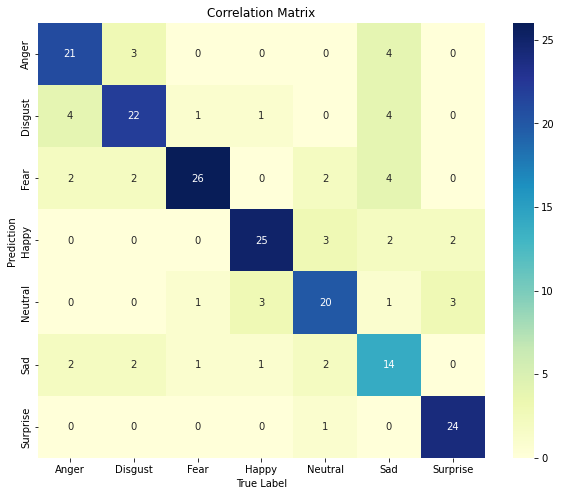

In [20]:
Emotion("Jaffe") #D-9